<a href="https://colab.research.google.com/github/381706-1Mityagina/Computer_vision_labs/blob/lab2/lab2_to_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image size:  torch.Size([588, 786, 3])


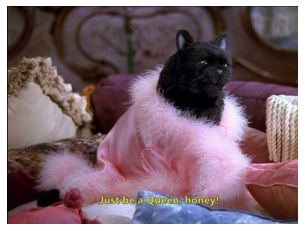

In [224]:
import torch, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
matplotlib.rc('image', cmap = 'gray')

img_url = 'https://sun9-50.userapi.com/impf/c854320/v854320642/a825e/ui88KZy1j2A.jpg?size=786x588&quality=96&proxy=1&sign=00b7bbed0b620115a27d51db8d8dd7d6'
img = imageio.imread(img_url)

# Transform into pytorch tensor.
img = torch.tensor(img, dtype=torch.float) / 255.0  

# Show the image size.
print('Image size: ', img.shape)

# Plot the image.
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()
  
display_image(img)

In [242]:
import numpy as np
import cv2

def calculateValue(padded_img, filter, i, j):
	h, w = filter.shape
	sum = 0
	for k in range(h):
		new_j = j
		for l in range(w):
			sum = sum + (filter[k][l] * padded_img[i][new_j])
			new_j = new_j + 1
		i = i + 1
	return sum


In [249]:
def convolution3D(image, kernel):  
	filter_size = kernel.shape[1]
	img_height, img_width = image.shape

	size_pad = 2

	h = img_height + size_pad
	w = img_width + size_pad
	new_img = np.zeros((h, w), 'uint8')
	new_img[(size_pad//2):(h-(size_pad//2)), (size_pad//2):(w-(size_pad//2))] = image
	flipped_f = kernel[::-1,::-1]
	img_copy = image.copy()

  # want the size to be the same
	for i in range(img_height):
		for j in range(img_width):
			img_copy[i][j] = calculateValue(new_img, flipped_f, i, j)

	return img_copy

Image size:  (588, 786, 3)


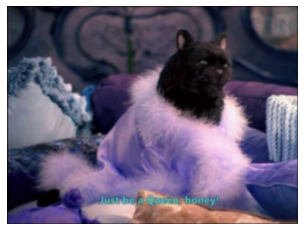

In [250]:
image = imageio.imread(img_url)[:,:,:3]
for k in range(5):
  f = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])[..., None]  # Sobel filter kernel

  # 2D filter to a 3D filter
  img_filter_3d = np.repeat(f, 3, axis=2)

  # image in RGB => (3,3,3)
  R = image[:,:,0].copy()
  G = image[:,:,1].copy()
  B = image[:,:,2].copy()

  R = convolution3D(R, img_filter_3d[0])
  G = convolution3D(G, img_filter_3d[1])
  B = convolution3D(B, img_filter_3d[2])

  image = cv2.merge((B,G,R))

print('Image size: ', image.shape)
display_image(image)


**ReLU**
f(x)=max(0,x)

Image size:  (588, 786, 3)


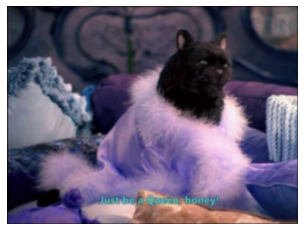

In [178]:
img_h, img_w, img_c = image.shape
img_copy = image.copy()

for i in range(img_h):
  for j in range(img_w):
    img_copy[i][j] = np.maximum(0, image[i][j])

display_image(img_copy)

**Max Pooling**

In [222]:
import math

def addMaxPooling2x2(inputImage, result):
  img_h, img_w, img_c = inputImage.shape

  for j in range(int(img_h/2)):
      for i in range(int(img_w/2)):
          result[j][i] = np.maximum(np.maximum(inputImage[j*2][i*2],inputImage[j*2][i*2+1]),np.maximum(inputImage[j*2+1][i*2],inputImage[j*2+1][i*2+1]))

  print('Output size: (', int(img_h/2),',', int(img_w/2),',', img_c, ')')
  return result

In [251]:
print('Original size: ', img_copy.shape)
res = addMaxPooling2x2(img_copy, res)


Original size:  (588, 786, 3)
Output size: ( 294 , 393 , 3 )
